# Pokemon Type Classification

This project is used to classify pokemon type based on it appearance

Dataset used is from kaggle - [Pokemon Image Dataset](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)

## 00. Import Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import random

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from keras.preprocessing.image import ImageDataGenerator

from PIL import Image

## 01. Data Loading

In [2]:
#load image directory
img_dir = './datasets/images/images'

files = os.path.join(img_dir)
file_names = os.listdir(files)

print(f'Num of Image: {len(file_names)}')

Num of Image: 809


In [3]:
#load pokemon detail csv
pokemon_df = pd.read_csv('./datasets/pokemon.csv')

pokemon_df.shape

(809, 3)

In [4]:
file_names[0]

'abomasnow.png'

In [5]:
pokemon_df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


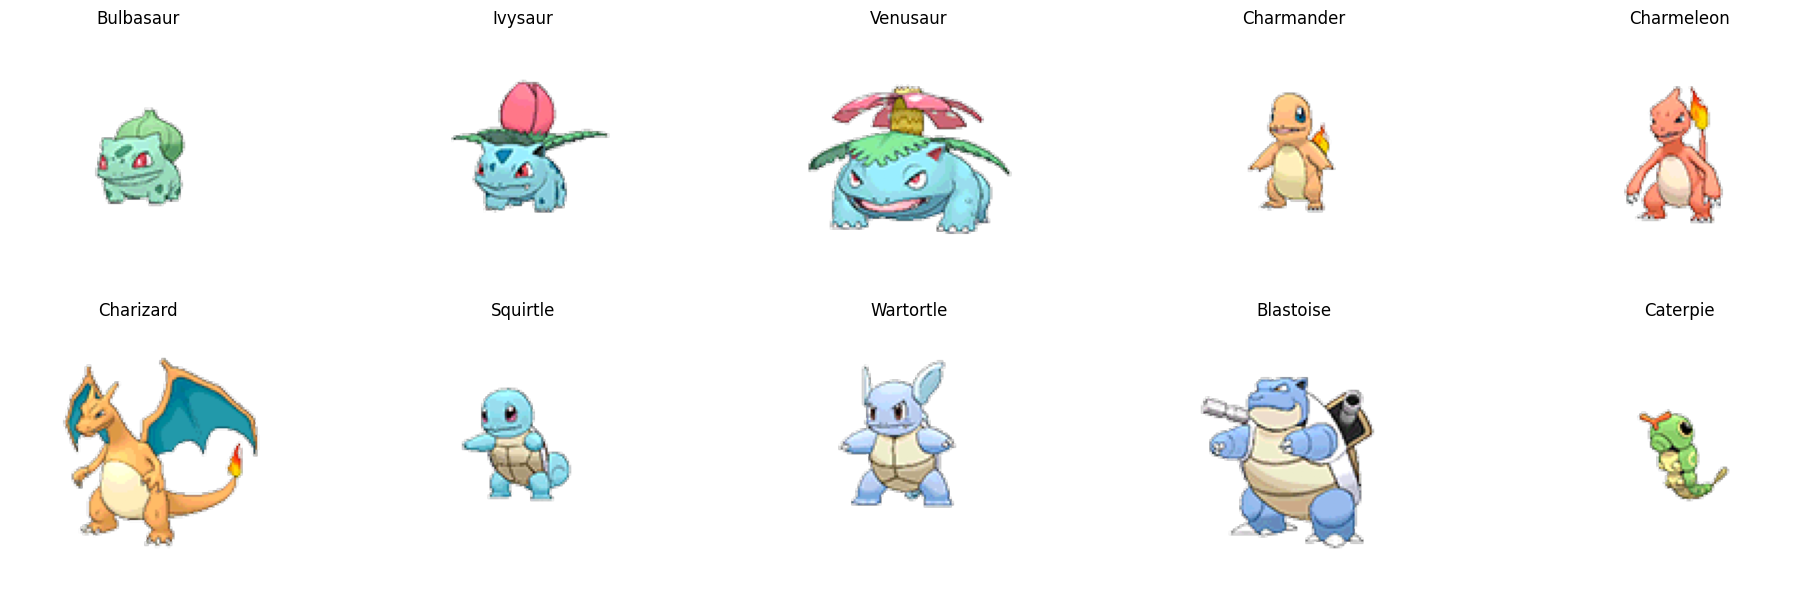

In [15]:
#display sample image

fig, axs = plt.subplots(2, 5, figsize=(20,6))

for i in range(0,10):
    pokemon_name = pokemon_df["Name"][i]
    img = plt.imread(f'{img_dir}/{pokemon_name}.png')
    if i < 5 :
        axs[0, i].imshow(img)
        axs[0, i].set_title(pokemon_name.capitalize())
        axs[0, i].axis('off')
    else:
        axs[1, i-5].imshow(img)
        axs[1, i-5].set_title(pokemon_name.capitalize())
        axs[1, i-5].axis('off')
        
        
fig.tight_layout()
    

## 02. Analyze Each Pokemon Characteristics

### Type Distribution

In [7]:
#get unique type

type_1_df = pokemon_df["Type1"].unique()

type_1_df

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [8]:
#create df for type 1
type1_counts = pokemon_df['Type1'].value_counts().reset_index()
type1_counts.columns = ['Type1', 'Count']

fig = px.bar(type1_counts, x='Type1', y='Count', title='Distribution of Type1')
fig.show()

In [17]:
#create df for type 2
type2_counts = pokemon_df['Type2'].value_counts().reset_index()
type2_counts.columns = ['Type2', 'Count']

fig = px.bar(type2_counts, x='Type2', y='Count', title='Distribution of Type2')
fig.show()

In [24]:
def disp_5_img(type_1):
    fig, axs = plt.subplots(1, 5, figsize=(20, 3))
    pokemon_list = pokemon_df[pokemon_df["Type1"] == type_1]
    
    random.seed(5)
    random_indices = random.sample(range(len(pokemon_list)), min(5, len(pokemon_list)))
    
    for i, idx in enumerate(random_indices):
        pokemon_name = pokemon_list["Name"].iloc[idx]
        try:
            img = plt.imread(f'{img_dir}/{pokemon_name}.png')
        except:
            img = plt.imread(f'{img_dir}/{pokemon_name}.jpg')
            
        axs[i].imshow(img)
        axs[i].set_title(pokemon_name.capitalize())
        axs[i].axis('off')
    
    fig.suptitle(f"Type: {type_1}", fontsize=16)
    plt.tight_layout()
    plt.show()

### Grass Type

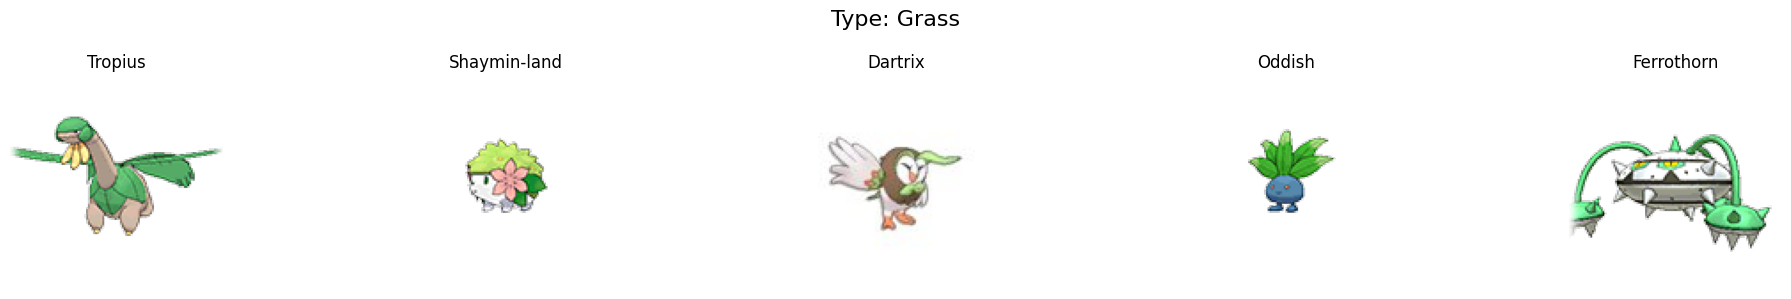

In [25]:
#grass type
disp_5_img("Grass")

### Fire Type

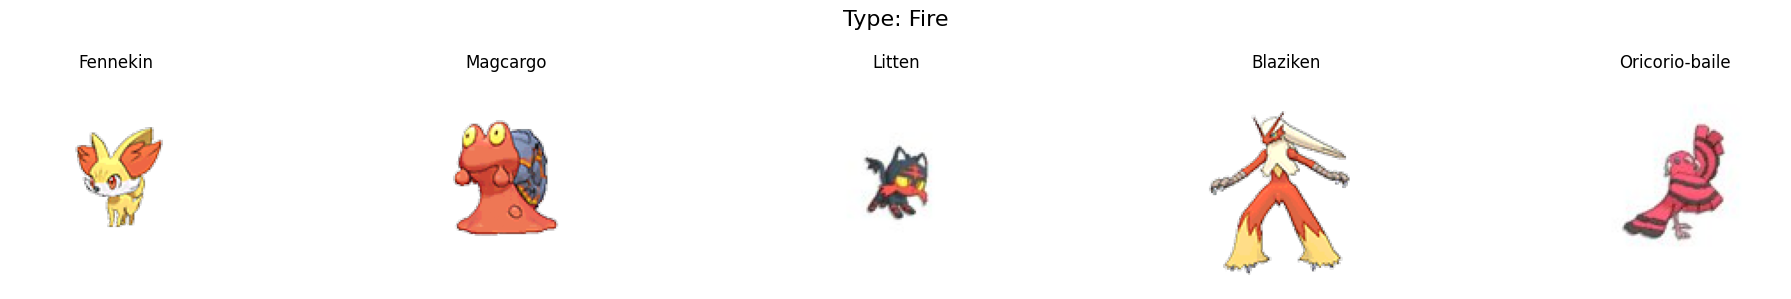

In [26]:
#fire type
disp_5_img("Fire")

### Water Type

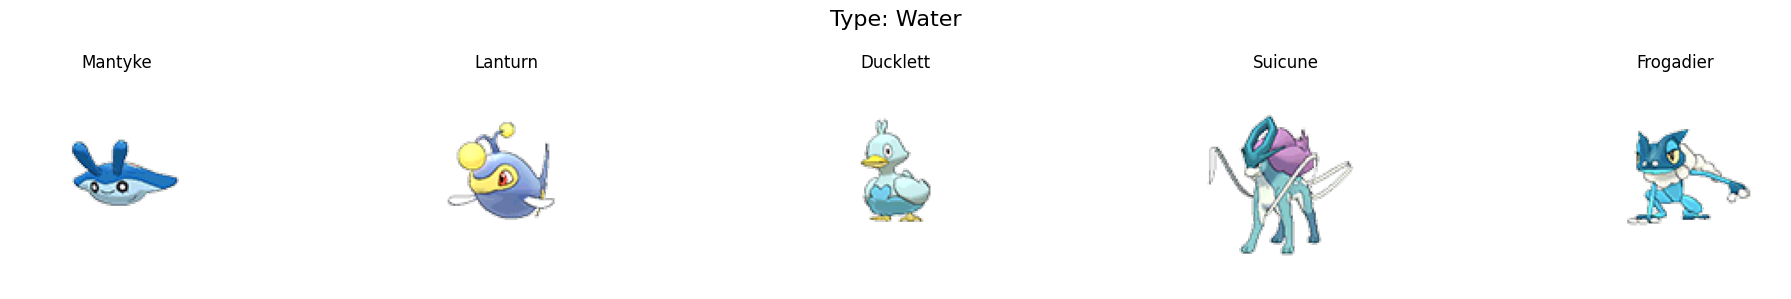

In [27]:
#water type
disp_5_img("Water")

### Electric

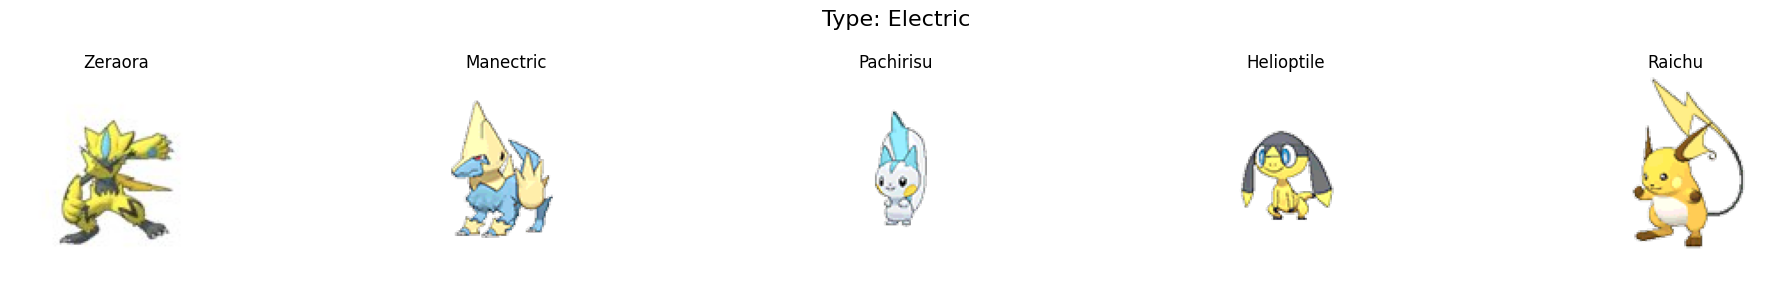

In [28]:
#electric type
disp_5_img("Electric")

## 03. Feature Engineering

### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1
)


train_generator = train_datagen.flow_from_dataframe(
    new_df, 
    x_col='filepath', y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    new_df , x_col='filepath', y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)